<a href="https://colab.research.google.com/github/joje2802/Programacion_en_Python/blob/main/Sesio%CC%81n_III_Tarea_2_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://drive.google.com/uc?export=view&id=1KaUW3_JAieeY7WVNfoRiTSr2JsaeAcXi)

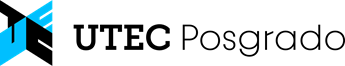

# Ejercícios para casa
# Módulo 3 - Sesión 3: Simulación II
## Profesor: Germain Garcia Zanabria

### Indicaciones

Completa las secciones de código en las que se indique `### Completar`. Siga las instrucciones y proporcione la implementación adecuada en cada caso.

In [1]:
!pip install simpy

## Ejercício 1: Simulación de Minería

En este ejercício simularemos el proceso de extracción de mineral por parte de mineros en una mina. Supondremos que hay un número fijo de mineros y cada minero tarda un tiempo aleatorio en extraer una cantidad fija de mineral.

**Descripción del problema:**
- El tiempo que tarda un minero en extraer el mineral es aleatorio (distribuido uniformemente).
- La mina tiene un número limitado de excavadoras ej. 3.
- Los mineros deben esperar si no hay una excavadora disponible.

Minero 1 empezó a extraer en el minuto 0.00
Minero 2 empezó a extraer en el minuto 0.00
Minero 3 empezó a extraer en el minuto 0.00
Minero 3 terminó de extraer en el minuto 10.00
Minero 4 empezó a extraer en el minuto 10.00
Minero 2 terminó de extraer en el minuto 13.00
Minero 5 empezó a extraer en el minuto 13.00
Minero 4 terminó de extraer en el minuto 28.00
Minero 3 empezó a extraer en el minuto 28.00
Minero 1 terminó de extraer en el minuto 30.00
Minero 5 terminó de extraer en el minuto 30.00
Minero 2 empezó a extraer en el minuto 30.00
Minero 4 empezó a extraer en el minuto 30.00
Minero 4 terminó de extraer en el minuto 43.00
Minero 1 empezó a extraer en el minuto 43.00
Minero 2 terminó de extraer en el minuto 44.00
Minero 5 empezó a extraer en el minuto 44.00
Minero 3 terminó de extraer en el minuto 45.00
Minero 4 empezó a extraer en el minuto 45.00
Minero 5 terminó de extraer en el minuto 56.00
Minero 2 empezó a extraer en el minuto 56.00
Minero 1 terminó de extraer en el minuto

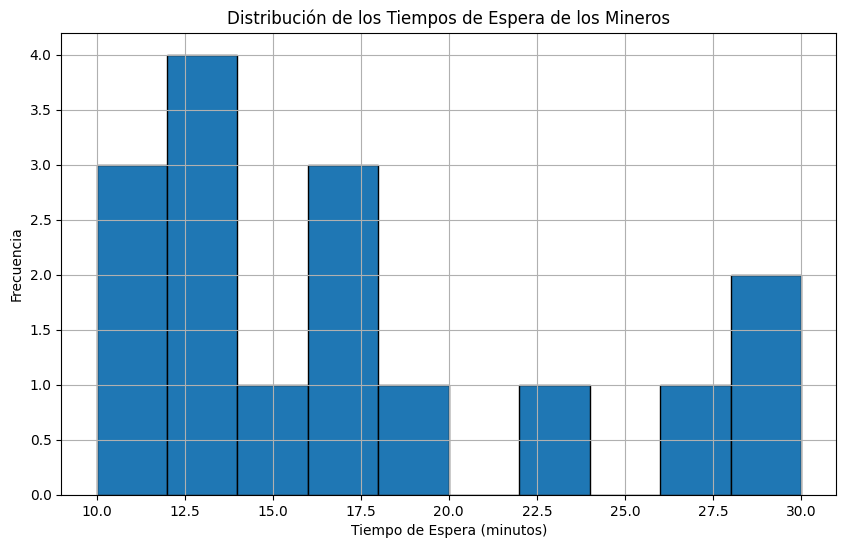

In [3]:
import simpy
import random
import matplotlib.pyplot as plt

# Parámetros de la simulación
NUM_MINEROS = 5  # Número de mineros
CAPACIDAD_EXCAVADORAS = 3  # Número de excavadoras
TIEMPO_MIN_EXTRACCION = 10  # Tiempo mínimo de extracción (minutos)
TIEMPO_MAX_EXTRACCION = 30  # Tiempo máximo de extracción (minutos)
TIEMPO_SIMULACION = 100  # Duración de la simulación (minutos)

# Lista para almacenar los tiempos de espera de los mineros
tiempos_espera = []

# Proceso de extracción de mineral
def minero(env, name, excavadoras):
    while True:
        with excavadoras.request() as req:
            yield req  # Solicitar una excavadora disponible
            tiempo_espera_inicio = env.now
            print(f'{name} empezó a extraer en el minuto {env.now:.2f}')

            # Generar un tiempo aleatorio de extracción
            tiempo_extraccion = random.randint(TIEMPO_MIN_EXTRACCION, TIEMPO_MAX_EXTRACCION)
            yield env.timeout(tiempo_extraccion)

            print(f'{name} terminó de extraer en el minuto {env.now:.2f}')
            tiempo_espera = env.now - tiempo_espera_inicio
            tiempos_espera.append(tiempo_espera)

# Función principal de la simulación
def principal(env, num_mineros, excavadoras):
    for i in range(num_mineros):
        env.process(minero(env, f'Minero {i+1}', excavadoras))
    # Esperar 0 unidades de tiempo antes de comenzar la simulación, necesario para que el simulador permita iniciar los procesos
    yield env.timeout(0)

# Configuración de la simulación
random.seed(42)
env = simpy.Environment()
excavadoras = simpy.Resource(env, capacity=3)  # Completar con la variable que tiene la cantidad de excavadoras
env.process(principal(env, NUM_MINEROS, excavadoras))
env.run(until=TIEMPO_SIMULACION)

# Imprimir resultados
print("Simulación completada.")

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.hist(tiempos_espera, bins=10, edgecolor='black')
plt.title('Distribución de los Tiempos de Espera de los Mineros')
plt.xlabel('Tiempo de Espera (minutos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


## Ejercício 2: Simulación de Estación de Gasolina


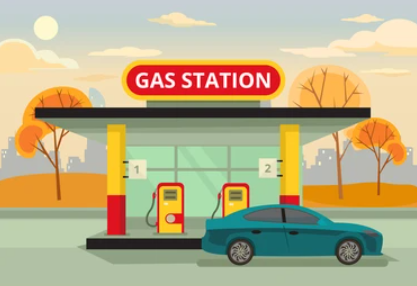

 En este ejercício se simulará la llegada de vehículos a la estación y la disponibilidad de surtidores para atenderlos.


**Descripción del problema:**
- Cada vehículo llega a la estación en momentos aleatorios, siguiendo un intervalo de llegada exponencialmente distribuido (`random.expovariate`).
- Cada vehículo debe esperar a que haya un surtidor disponible.
- Una vez que obtiene acceso al surtidor, el vehículo realiza un repostaje que también tiene una duración aleatoria (`random.randint` distribución uniforme).
- Se calcula el tiempo total de espera de cada vehículo y se registran estos tiempos para analizar la eficiencia operativa de la estación.
- Al finalizar la simulación, se muestra un histograma que representa la distribución de los tiempos de espera de los vehículos, y se calcula el tiempo promedio de espera como métrica de rendimiento.

Vehículo 1 llegó a la estación en el minuto 0.00
Vehículo 1 comenzó a repostar en el minuto 0.00
Vehículo 1 completó el repostaje en el minuto 5.00. Tiempo de repostaje: 5 minutos
Vehículo 2 llegó a la estación en el minuto 10.20
Vehículo 2 comenzó a repostar en el minuto 10.20
Vehículo 2 completó el repostaje en el minuto 18.20. Tiempo de repostaje: 8 minutos
Vehículo 3 llegó a la estación en el minuto 23.73
Vehículo 3 comenzó a repostar en el minuto 23.73
Vehículo 4 llegó a la estación en el minuto 26.26
Vehículo 4 comenzó a repostar en el minuto 26.26
Vehículo 3 completó el repostaje en el minuto 29.73. Tiempo de repostaje: 6 minutos
Vehículo 5 llegó a la estación en el minuto 37.55
Vehículo 5 comenzó a repostar en el minuto 37.55
Vehículo 6 llegó a la estación en el minuto 38.46
Vehículo 7 llegó a la estación en el minuto 38.78
Vehículo 4 completó el repostaje en el minuto 39.26. Tiempo de repostaje: 13 minutos
Vehículo 6 comenzó a repostar en el minuto 39.26
Vehículo 8 llegó a la 

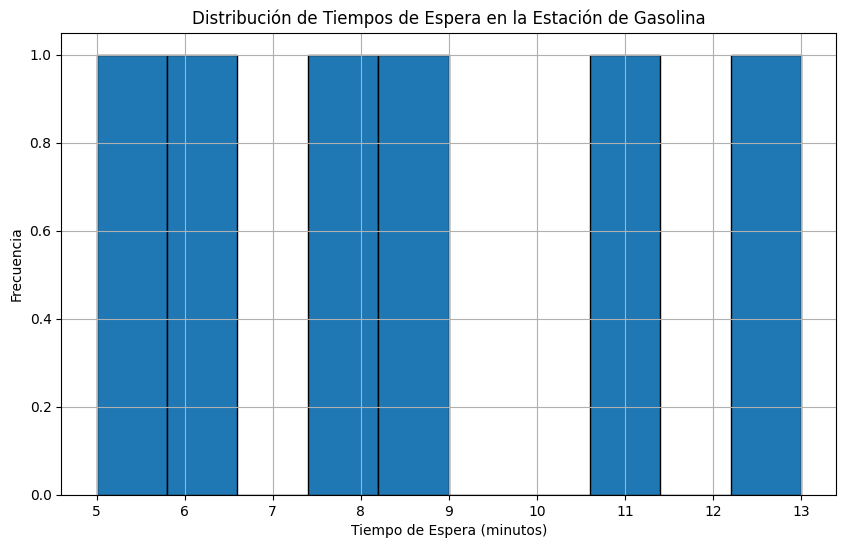

Tiempo promedio de espera: 8.63 minutos


In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

# Parámetros de la simulación
NUM_SURTIDORES = 2  # Número de surtidores disponibles
TIEMPO_REPOSTAJE_MIN = 5  # Tiempo mínimo de repostaje (minutos)
TIEMPO_REPOSTAJE_MAX = 15  # Tiempo máximo de repostaje (minutos)
TIEMPO_SIMULACION = 60  # Duración de la simulación (minutos)
INTERVALO_LLEGADA = 10  # Intervalo medio de llegada de vehículos (minutos)

# Lista para almacenar los tiempos de espera de los vehículos
tiempos_espera = []

# Proceso de llegada de vehículos a la estación de gasolina
def llegada_vehiculo(env, nombre, surtidores):
    print(f'{nombre} llegó a la estación en el minuto {env.now:.2f}')
    tiempo_llegada = env.now  # Capturar el tiempo en el que llegó a la estación (tiempo actual)

    with surtidores.request() as req:
        yield req
        tiempo_espera = env.now - tiempo_llegada  # Calcular el tiempo de espera antes de empezar a repostar
        print(f'{nombre} comenzó a repostar en el minuto {env.now:.2f}')

        # Generar tiempo aleatorio de repostaje
        tiempo_repostaje = random.randint(TIEMPO_REPOSTAJE_MIN, TIEMPO_REPOSTAJE_MAX)  # Distribución uniforme
        yield env.timeout(tiempo_repostaje)

        # Calcular tiempo total de espera
        tiempo_total_espera = env.now - tiempo_llegada  # Diferencia entre el tiempo actual y el tiempo en el que llegó a la estación
        tiempos_espera.append(tiempo_total_espera)  # Añadir el tiempo calculado a la lista

        print(f'{nombre} completó el repostaje en el minuto {env.now:.2f}. Tiempo de repostaje: {tiempo_repostaje} minutos')

# Función principal de la simulación
def simulacion_estacion(env, num_surtidores):
    surtidores = simpy.Resource(env, capacity=num_surtidores)
    num_vehiculos = 0

    while True:
        num_vehiculos += 1
        env.process(llegada_vehiculo(env, f'Vehículo {num_vehiculos}', surtidores))
        tiempo_llegada = random.expovariate(1.0 / INTERVALO_LLEGADA)  # distribución exponencial
        yield env.timeout(tiempo_llegada)

# Configuración de la simulación
random.seed(42)
env = simpy.Environment()
env.process(simulacion_estacion(env, NUM_SURTIDORES))
env.run(until=TIEMPO_SIMULACION)

# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.hist(tiempos_espera, bins=10, edgecolor='black')
plt.title('Distribución de Tiempos de Espera en la Estación de Gasolina')
plt.xlabel('Tiempo de Espera (minutos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Métricas
tiempo_promedio_espera = sum(tiempos_espera) / len(tiempos_espera) if tiempos_espera else 0
print(f'Tiempo promedio de espera: {tiempo_promedio_espera:.2f} minutos')


# Ejercício 3: Inventario en Supermercado

Este es un ejercício de una simulación de un supermercado para gestionar un producto lácteo, como la leche. En esta simulación, modelamos la llegada de nuevos suministros de leche, la venta diaria y el monitoreo de los niveles de stock:

**Descripción del problema:**
- Este ejemplo permite gestionar de manera básica el inventario de leche en un supermercado, modelando la llegada de productos y la venta diaria.
- El día 0 termina con 100 lotes de leche.
- `llegada_leche(env)`: Simula la llegada de nuevos lotes de leche al supermercado a intervalos de tiempo aleatorios. Cada vez que llega un nuevo lote, se añade al stock actual de leche.
- `venta_leche(env)`: Simula la venta diaria de leche. Cada día, se verifica si hay suficiente leche en stock para satisfacer la demanda diaria. Si es así, se realiza la venta y se actualiza el stock. Si no hay suficiente leche disponible, se muestra un mensaje indicando la escasez.
- La simulación se ejecuta durante 7 días (`DIAS_SIMULACION`) y se registra la cantidad de leche en stock día a día. Los resultados se visualizarán al final con un gráfico que muestra cómo varía el stock de leche a lo largo del tiempo.

Llegó un nuevo lote de leche en el día 0.05 de 47 unidades 
Ventas del día 1: Se vendieron 29 unidades de leche
Llegó un nuevo lote de leche en el día 1.86 de 32 unidades 
Ventas del día 2: Se vendieron 29 unidades de leche
Ventas del día 3: Se vendieron 29 unidades de leche
Ventas del día 4: Se vendieron 29 unidades de leche
Llegó un nuevo lote de leche en el día 4.47 de 57 unidades 
Llegó un nuevo lote de leche en el día 4.74 de 43 unidades 
Ventas del día 5: Se vendieron 29 unidades de leche
Llegó un nuevo lote de leche en el día 5.40 de 36 unidades 
Ventas del día 6: Se vendieron 29 unidades de leche
stock final de leche [100, 147, 118, 150, 121, 92, 63, 120, 163, 134, 170, 141]
[100, 118, 121, 92, 63, 134, 141]


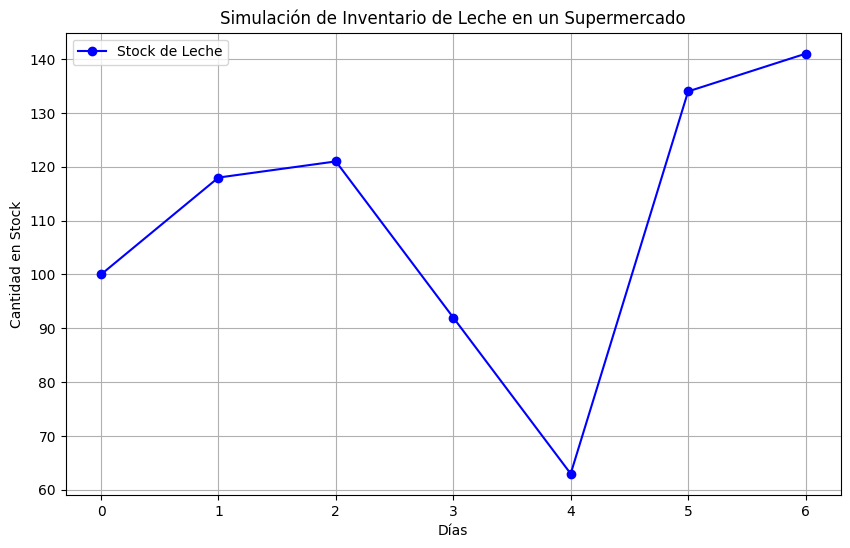

In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

# Parámetros de la simulación
DIAS_SIMULACION = 7            # Duración de la simulación en días
INTERVALO_LLEGADA_LECHE = 1    # Intervalo de llegada de leche (días)
VENTA_DIARIA_LECHE = 29        # Venta diaria promedio de leche
STOCK_INICIAL_LECHE = 100      # Stock inicial de leche

# Listas para almacenar datos de la simulación
stock_leche = []  # Registro de lotes que ingresan y de los que son vendidos. El último valor de este arreglo siempre contendrá la cantidad restante de stock de leche
stock_al_final_del_dia = [STOCK_INICIAL_LECHE]  # arreglo útil para plotear

# Función que simula la llegada de leche al supermercado
def llegada_leche(env):
    while True:
        tiempo_llegada_leche = random.expovariate(1 / INTERVALO_LLEGADA_LECHE)
        yield env.timeout(tiempo_llegada_leche)
        stock_leche.append(stock_leche[-1])  # Mantiene el último valor de stock de leche
        nuevo_lote = random.randint(30, 60)  # Genera un lote entre 30 y 60 unidades
        stock_leche[-1] += nuevo_lote  # Agrega un lote aleatorio de leche
        print(f"Llegó un nuevo lote de leche en el día {env.now:.2f} de {nuevo_lote} unidades ")

# Función que simula la venta diaria de leche
def venta_leche(env):
    while True:
        yield env.timeout(1)  # Simula la venta cada día
        if stock_leche[-1] >= VENTA_DIARIA_LECHE:
            stock_leche.append(stock_leche[-1] - VENTA_DIARIA_LECHE)
            print(f"Ventas del día {env.now}: Se vendieron {VENTA_DIARIA_LECHE} unidades de leche")
            stock_al_final_del_dia.append(stock_leche[-1])
        else:
            print(f"-- No hay suficiente leche disponible el día {env.now}")

# Configuración de la simulación
env = simpy.Environment()

# Inicialización del stock inicial
stock_leche.append(STOCK_INICIAL_LECHE)

# Iniciar los procesos de llegada y venta
env.process(llegada_leche(env))  # Proceso de llegada de leche
env.process(venta_leche(env))    # Proceso de venta de leche

# Ejecutar la simulación
env.run(until=DIAS_SIMULACION)

# Stock final
print('stock final de leche', stock_leche)
print(stock_al_final_del_dia)

# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.plot(range(len(stock_al_final_del_dia)), stock_al_final_del_dia, marker='o', linestyle='-', color='b', label='Stock de Leche')
plt.xlabel('Días')
plt.ylabel('Cantidad en Stock')
plt.title('Simulación de Inventario de Leche en un Supermercado')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install simpy